# **Statistical analysis**

### Objectives
- Do a statistical analysis on as many variables as possible to check whether there is any relationship between `class` and the variable.

### Input
- The cleaned and preprocessed dataset.

### Output
- Distribution graphs and statistical tests summarized in the table at the end

## Load the data
Here we will import the relevant libraries

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

And load the data

In [68]:
df = pd.read_csv("../data/clean/network-intrusions-clean.csv")
print(df.shape)
df.head()

(25192, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,service_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,File_Transfer
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Other
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,Other
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Web
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Web


## 1. Continuous (float64) variable distribution and statistical tests
We will do the following two things:
- plot a histogram 
 From our data cleaning we know that none of them are normally distributed therefore

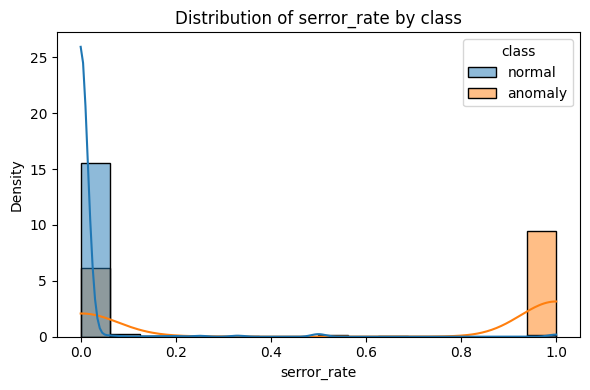

U statistic: 30637087.5
p-value: 0.0
significant




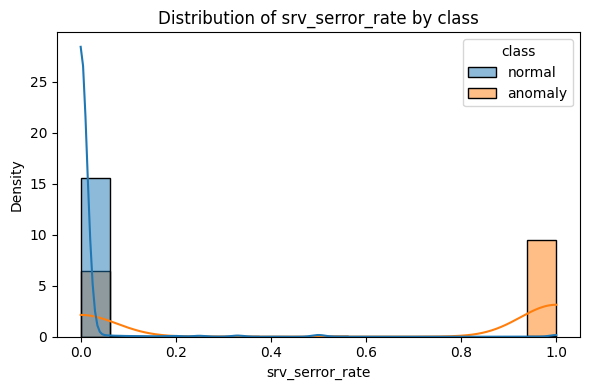

U statistic: 33273691.5
p-value: 0.0
significant




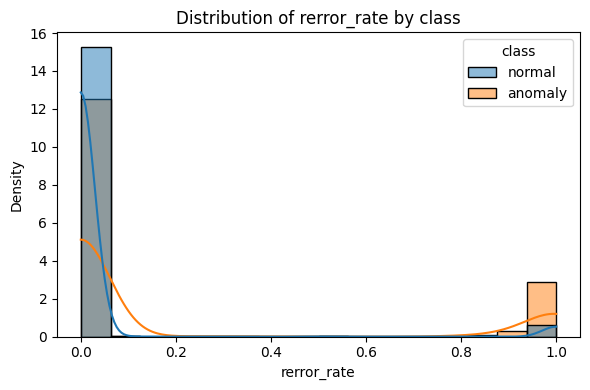

U statistic: 65241081.0
p-value: 0.0
significant




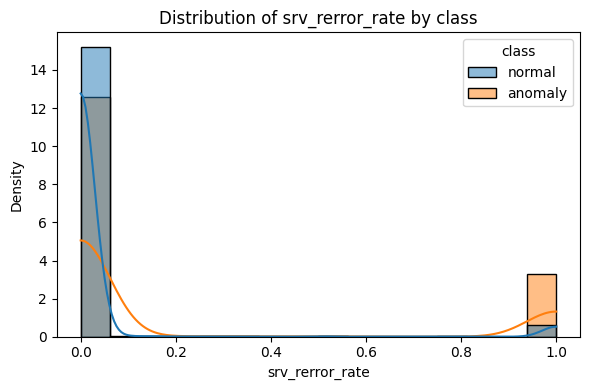

U statistic: 65921543.0
p-value: 0.0
significant




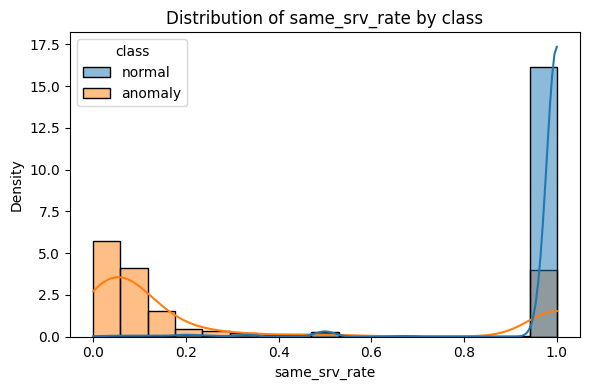

U statistic: 137776682.0
p-value: 0.0
significant




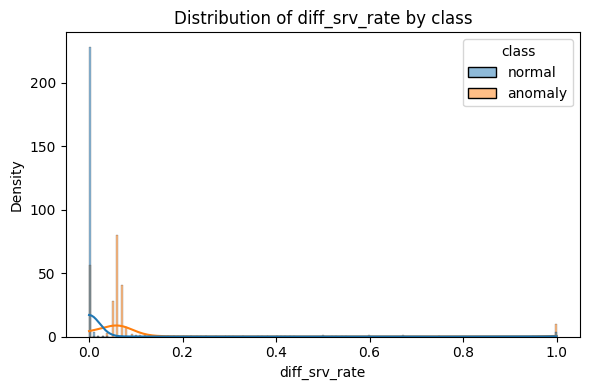

U statistic: 24941812.0
p-value: 0.0
significant




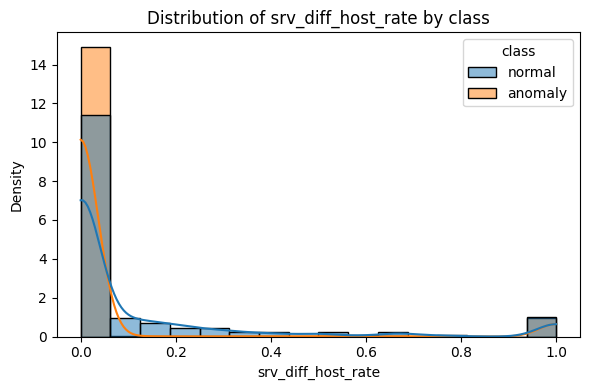

U statistic: 100738410.0
p-value: 0.0
significant




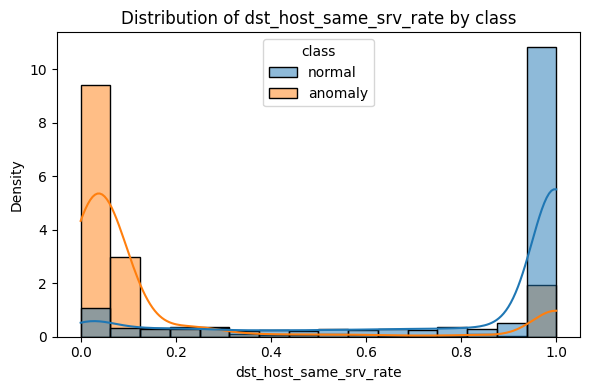

U statistic: 136486749.5
p-value: 0.0
significant




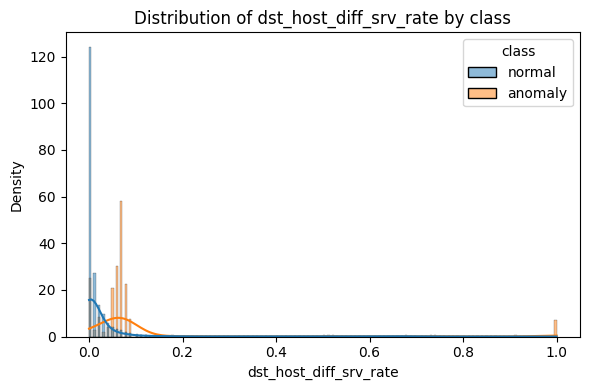

U statistic: 27664130.5
p-value: 0.0
significant




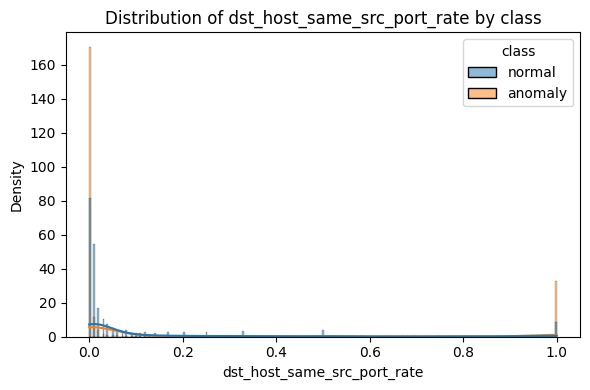

U statistic: 99557868.0
p-value: 0.0
significant




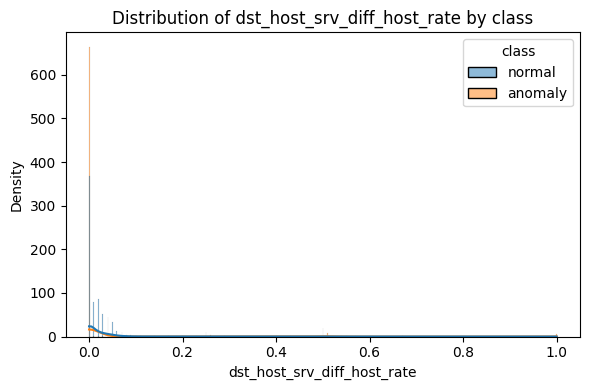

U statistic: 107574503.0
p-value: 0.0
significant




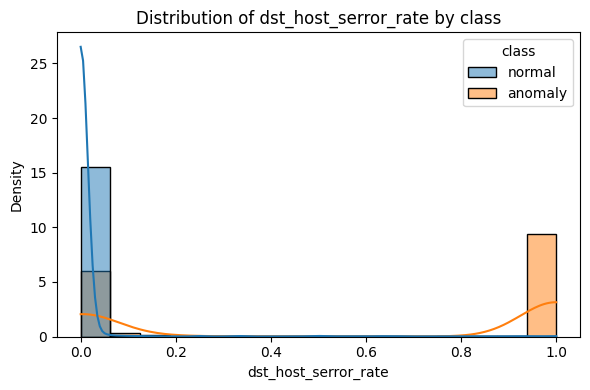

U statistic: 29819649.5
p-value: 0.0
significant




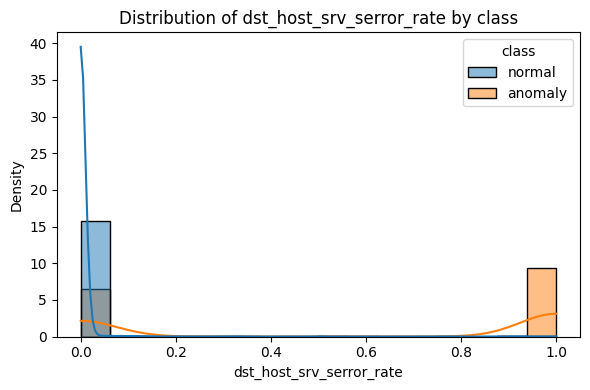

U statistic: 34130110.5
p-value: 0.0
significant




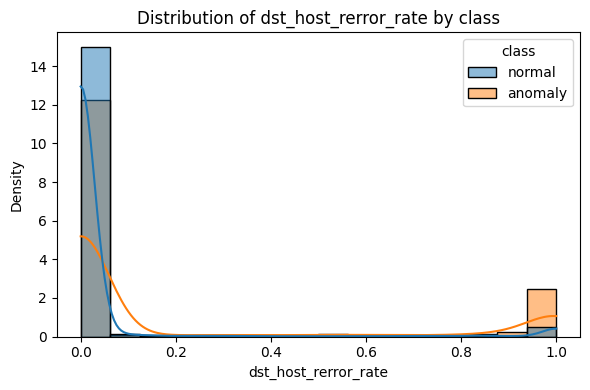

U statistic: 65736968.5
p-value: 1.4801127639459754e-259
significant




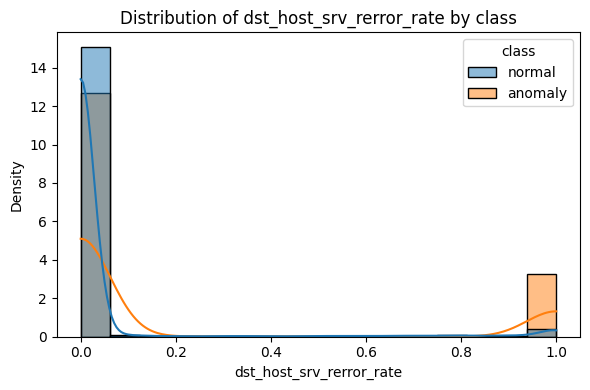

U statistic: 67394605.0
p-value: 5.025959532654295e-227
significant




,variable,test,statistic,p_value,significant
0,serror_rate,Mann–Whitney U,30637087.5,0.000000e+00,True
1,srv_serror_rate,Mann–Whitney U,33273691.5,0.000000e+00,True
2,rerror_rate,Mann–Whitney U,65241081.0,0.000000e+00,True
3,srv_rerror_rate,Mann–Whitney U,65921543.0,0.000000e+00,True
4,same_srv_rate,Mann–Whitney U,137776682.0,0.000000e+00,True
5,diff_srv_rate,Mann–Whitney U,24941812.0,0.000000e+00,True
6,srv_diff_host_rate,Mann–Whitney U,100738410.0,0.000000e+00,True
7,dst_host_same_srv_rate,Mann–Whitney U,136486749.5,0.000000e+00,True
8,dst_host_diff_srv_rate,Mann–Whitney U,27664130.5,0.000000e+00,True
9,dst_host_same_src_port_rate,Mann–Whitney U,99557868.0,0.000000e+00,True


In [69]:
float_cols = df.select_dtypes(include='float64')

stat_summary_float = pd.DataFrame(columns=['variable', 'test', 'statistic', 'p_value', 'significant'])

for col in float_cols:
    # Plot histogram with KDEs
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='class', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {col} by class')
    plt.tight_layout()
    plt.show()
    
    # Split into two groups
    group_normal = df[df['class'] == 'normal'][col].dropna()
    group_anomaly = df[df['class'] == 'anomaly'][col].dropna()
    
    # Mann–Whitney U test
    U, p = stats.mannwhitneyu(group_normal, group_anomaly, alternative='two-sided')
    print(f"U statistic: {U}")
    print(f"p-value: {p}")
    if p < 0.05:
        print("significant")
    else:
        print("Not significant")
    print('\n')

    # Record results
    stat_summary_float = pd.concat([
        stat_summary_float,
        pd.DataFrame({
            'variable': [col],
            'test': 'Mann–Whitney U',
            'statistic': [U],
            'p_value': [p],
            'significant': [p < 0.05]
        })
    ], ignore_index=True)

stat_summary_float

As you can see all of these results are significant and have astronomically small p values, in fact they are so small in most cases that they cannot fit in the float data type and gets rounded to 0.

## 2. Discrete numeric (int64) feature distribution and statistical analysis
Here we will analyze the distribution and statistical significance of integer features with more than 10 unique values. We will also use Mann–Whitney U test because as we have seen during the data cleaning process none of them are normally distributed. Unfortunately we couldn't graph these variables in their original form as many of them caused issue with the kernel due to extreme outliers so we had to use the log transform:

We used: `np.log1p(x)` which means means ln(1 + x) (ln = natural log base e). We used x + 1 rather than x because it can handle zeros (since log(0) is undefined, but log(1+0)=0)

['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count']




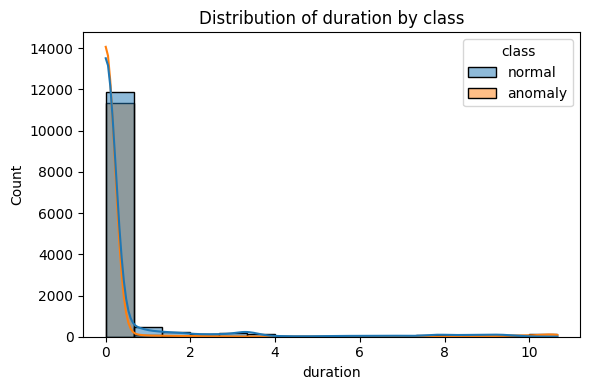

U statistic: 85377342.0
p-value: 2.2602031967755383e-123
significant




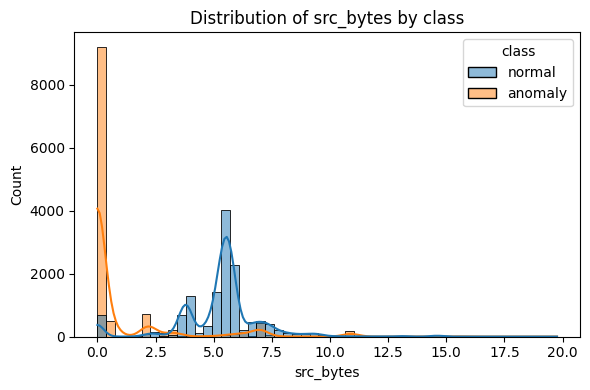

U statistic: 141921650.5
p-value: 0.0
significant




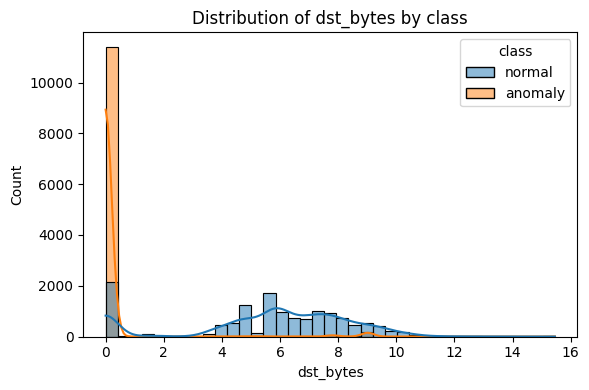

U statistic: 142093157.0
p-value: 0.0
significant




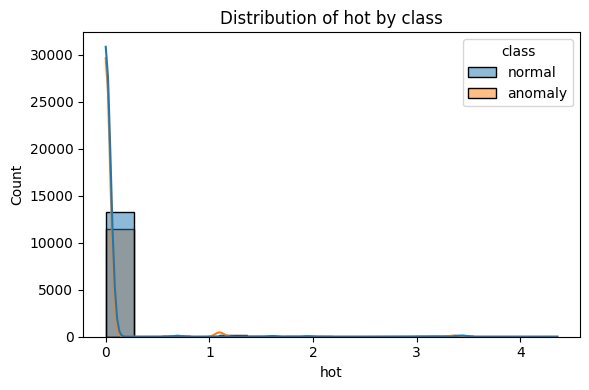

U statistic: 78391326.0
p-value: 5.100892559849966e-05
significant




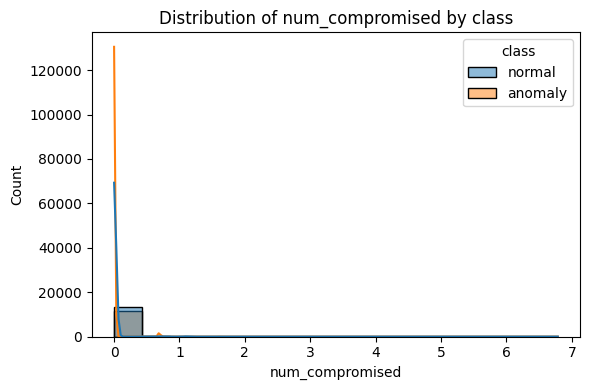

U statistic: 78276528.5
p-value: 2.2742895899329578e-11
significant




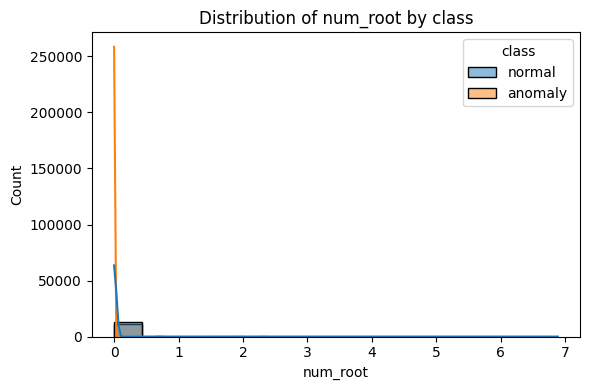

U statistic: 79702083.0
p-value: 3.339926442248901e-24
significant




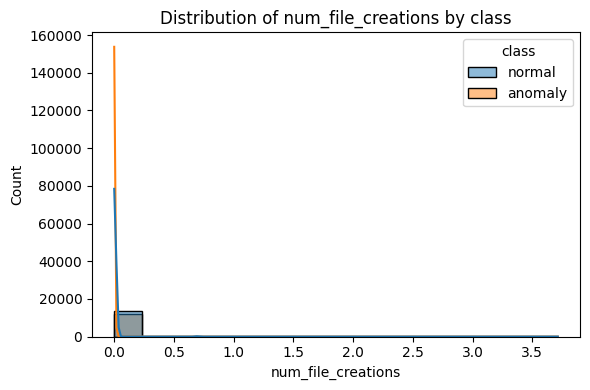

U statistic: 79227373.0
p-value: 2.88779605568873e-07
significant




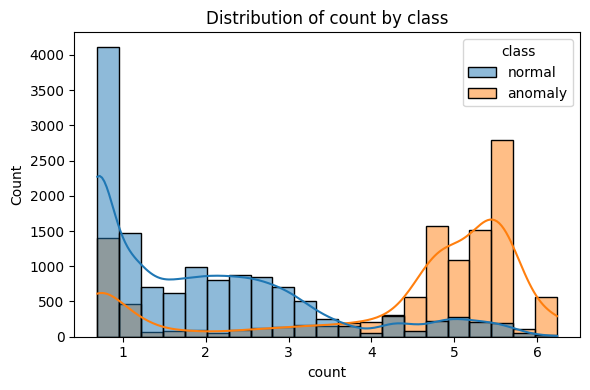

U statistic: 28304552.0
p-value: 0.0
significant




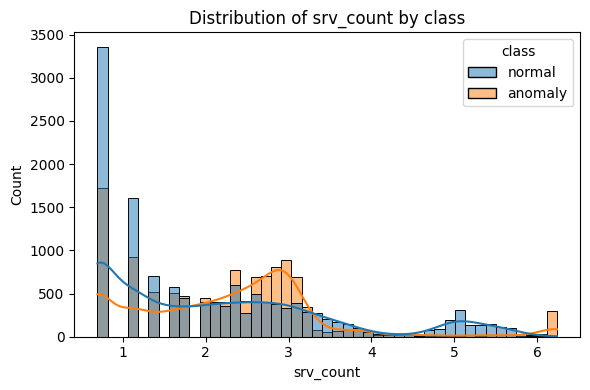

U statistic: 69598237.0
p-value: 4.4817846637714316e-60
significant




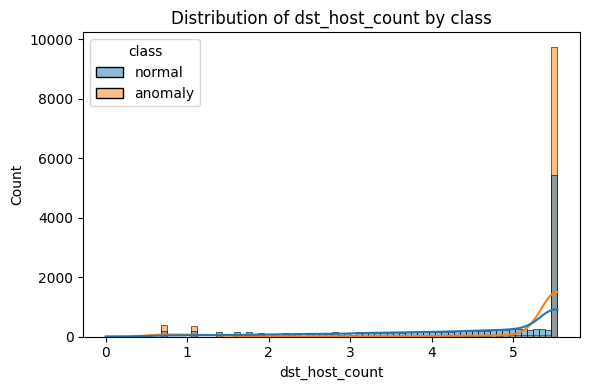

U statistic: 46684243.5
p-value: 0.0
significant




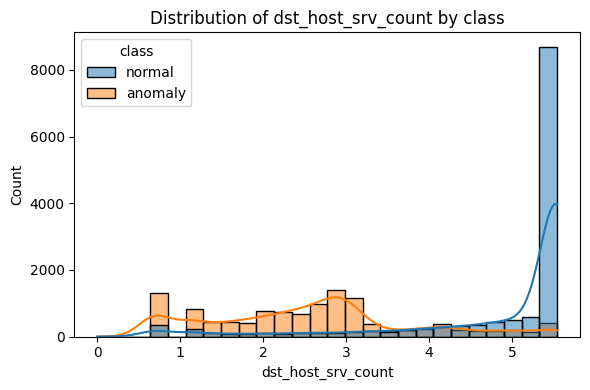

U statistic: 140690442.5
p-value: 0.0
significant




,variable,test,statistic,p_value,significant
0,duration,Mann–Whitney U,85377342.0,2.260203e-123,True
1,src_bytes,Mann–Whitney U,141921650.5,0.000000e+00,True
2,dst_bytes,Mann–Whitney U,142093157.0,0.000000e+00,True
3,hot,Mann–Whitney U,78391326.0,5.100893e-05,True
4,num_compromised,Mann–Whitney U,78276528.5,2.274290e-11,True
5,num_root,Mann–Whitney U,79702083.0,3.339926e-24,True
6,num_file_creations,Mann–Whitney U,79227373.0,2.887796e-07,True
7,count,Mann–Whitney U,28304552.0,0.000000e+00,True
8,srv_count,Mann–Whitney U,69598237.0,4.481785e-60,True
9,dst_host_count,Mann–Whitney U,46684243.5,0.000000e+00,True


In [70]:
cols_with_few_uniques = []
cols_with_many_uniques = []

for col in df.select_dtypes(include='int64').columns:
    unique_count = df[col].nunique()
    if unique_count <= 10:
        cols_with_few_uniques.append(col)
    else:
        cols_with_many_uniques.append(col)

print(cols_with_many_uniques)
print('\n')

stat_summary_int1 = pd.DataFrame(columns=['variable', 'test', 'statistic', 'p_value', 'significant'])

for col in cols_with_many_uniques:
    # Plot histogram with KDEs
    plt.figure(figsize=(6, 4))
    #sns.histplot(data=df, x=col, hue='class', kde=True, stat='density', common_norm=False)
    sns.histplot(data=df, x=np.log1p(df[col]), hue='class', kde=True)
    plt.title(f'Distribution of {col} by class')
    plt.tight_layout()
    plt.show()
    
    # Split into two groups
    group_normal = df[df['class'] == 'normal'][col].dropna()
    group_anomaly = df[df['class'] == 'anomaly'][col].dropna()
    
    # Mann–Whitney U test
    U, p = stats.mannwhitneyu(group_normal, group_anomaly, alternative='two-sided')
    print(f"U statistic: {U}")
    print(f"p-value: {p}")
    if p < 0.05:
        print("significant")
    else:
        print("Not significant")
    print('\n')

    # Record results
    stat_summary_int1 = pd.concat([
        stat_summary_int1,
        pd.DataFrame({
            'variable': [col],
            'test': 'Mann–Whitney U',
            'statistic': [U],
            'p_value': [p],
            'significant': [p < 0.05]
        })
    ], ignore_index=True)

stat_summary_int1

As you can see from the graphs not all relationships are clearly visible from the graphs alone due to the clustering around 0. Nevertheless all of them seem to be significant. The least significant of these are `hot` and `num_file_creations` but even these have significant p  values.

## Quasi categorical (int64) feature count and statistical analysis

Processing land...


land         0  1
class            
anomaly  11742  1
normal   13448  1


chi^2 statistic: 0.0
p-value: 1.0
Not significant




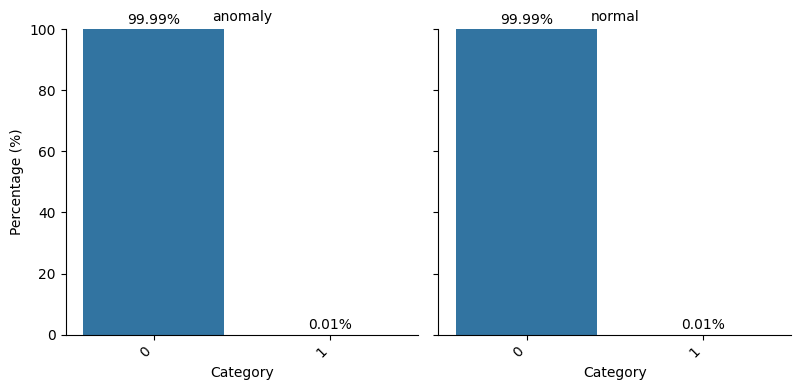

------------------------------
Processing wrong_fragment...


wrong_fragment      0   1    3
class                         
anomaly         11519  37  187
normal          13449   0    0


chi^2 statistic: 258.8438453438745
p-value: 6.205448079642222e-57
significant




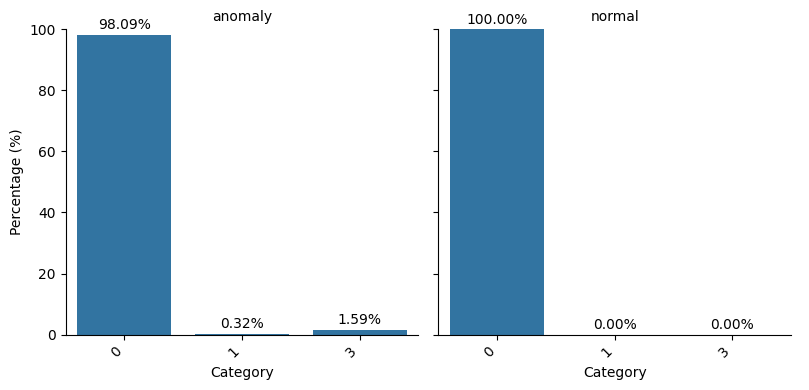

------------------------------
Processing urgent...


urgent       0  1
class            
anomaly  11742  1
normal   13449  0


chi^2 statistic: 0.004607297408736043
p-value: 0.9458834875796664
Not significant




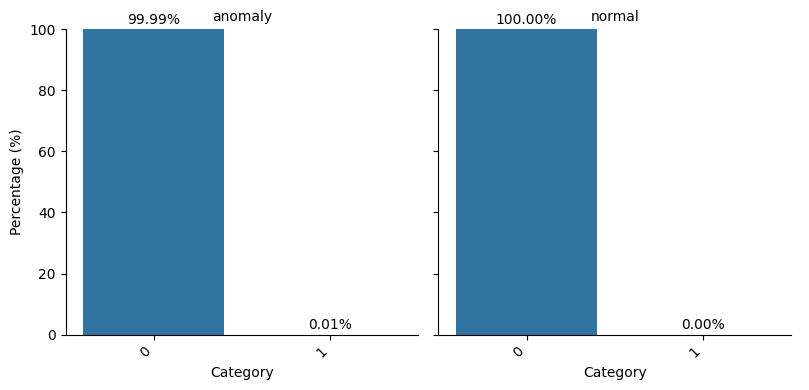

------------------------------
Processing num_failed_logins...


num_failed_logins      0   1  2  3  4
class                                
anomaly            11732  10  0  0  1
normal             13437   9  2  1  0


chi^2 statistic: 4.041214750043867
p-value: 0.40045677483548753
Not significant




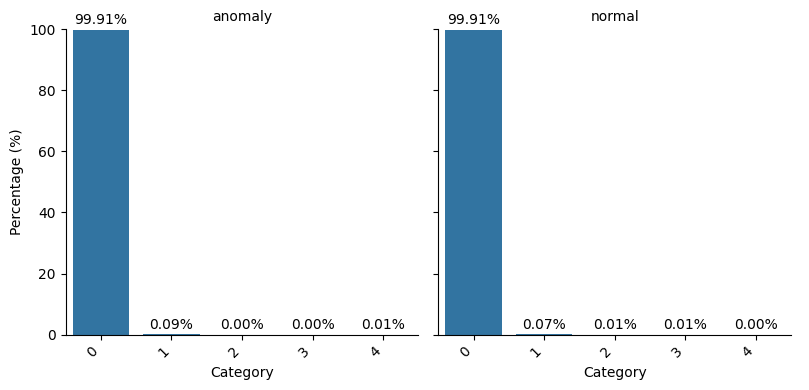

------------------------------
Processing logged_in...


logged_in      0     1
class                 
anomaly    11334   409
normal      3913  9536


chi^2 statistic: 11924.568892461111
p-value: 0.0
significant




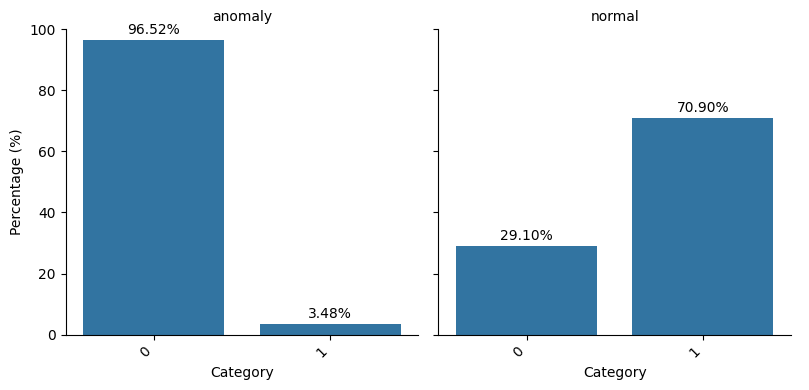

------------------------------
Processing root_shell...


root_shell      0   1
class                
anomaly     11734   9
normal      13419  30


chi^2 statistic: 7.774099165263841
p-value: 0.005300064014924389
significant




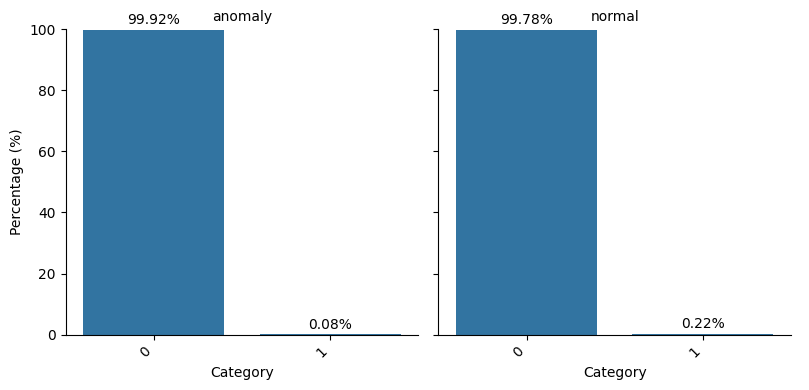

------------------------------
Processing su_attempted...


su_attempted      0  1   2
class                     
anomaly       11743  0   0
normal        13428  8  13


chi^2 statistic: 18.351456559107596
p-value: 0.0001035218061973012
significant




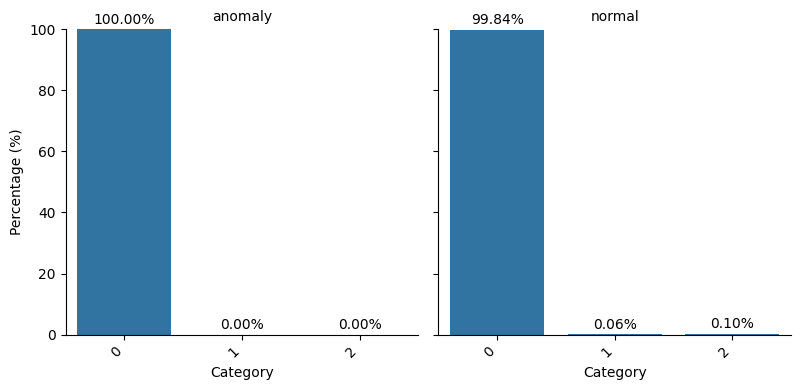

------------------------------
Processing num_shells...


num_shells      0  1
class               
anomaly     11742  1
normal      13441  8


chi^2 statistic: 3.2446688134385377
p-value: 0.07165617090777363
Not significant




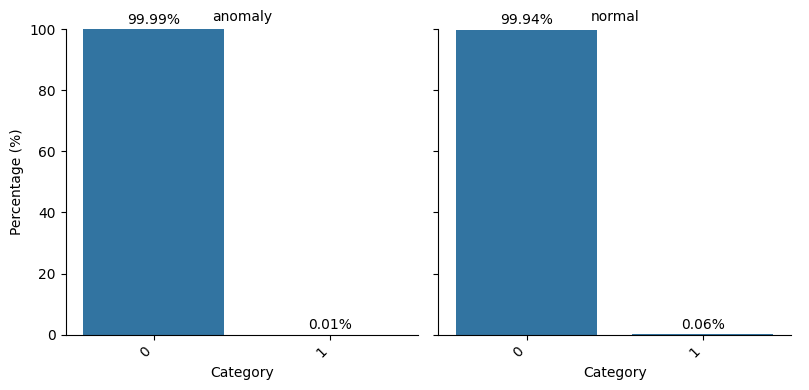

------------------------------
Processing num_access_files...


num_access_files      0   1  2  3  4  5  8
class                                     
anomaly           11739   3  1  0  0  0  0
normal            13374  62  7  2  1  2  1


chi^2 statistic: 55.22479368914855
p-value: 4.175390195478512e-10
significant




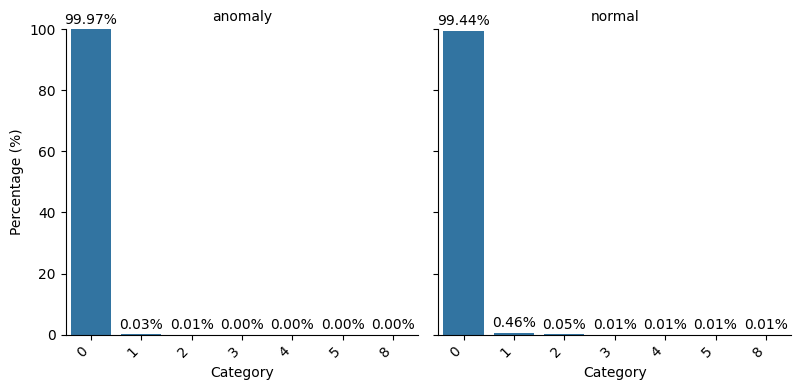

------------------------------
Processing is_guest_login...


is_guest_login      0    1
class                     
anomaly         11682   61
normal          13280  169


chi^2 statistic: 36.84479242739502
p-value: 1.2791730777856527e-09
significant




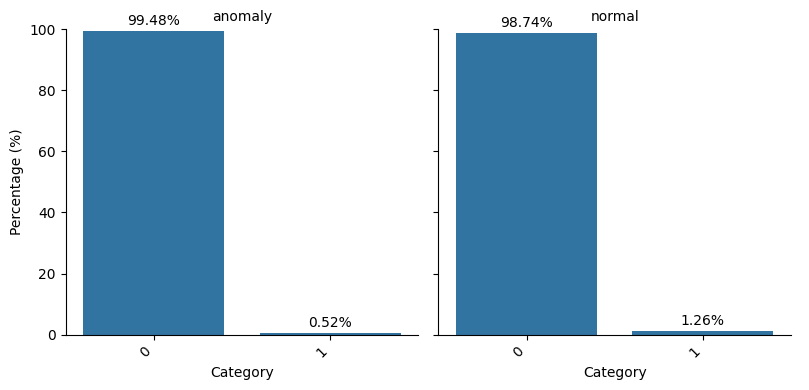

------------------------------


,variable,test,statistic,p_value,significant
0,land,chi squared,0.000000,1.000000e+00,False
1,wrong_fragment,chi squared,258.843845,6.205448e-57,True
2,urgent,chi squared,0.004607,9.458835e-01,False
3,num_failed_logins,chi squared,4.041215,4.004568e-01,False
4,logged_in,chi squared,11924.568892,0.000000e+00,True
5,root_shell,chi squared,7.774099,5.300064e-03,True
6,su_attempted,chi squared,18.351457,1.035218e-04,True
7,num_shells,chi squared,3.244669,7.165617e-02,False
8,num_access_files,chi squared,55.224794,4.175390e-10,True
9,is_guest_login,chi squared,36.844792,1.279173e-09,True


In [71]:
stat_summary_int2 =  pd.DataFrame(columns=['variable', 'test', 'statistic', 'p_value', 'significant'])

for col in cols_with_few_uniques:
    print(f"Processing {col}...")
    print('\n')

    # Create contingency table (class × category)
    contingency = pd.crosstab(df['class'], df[col])
    print(contingency)
    print('\n')

    # Perform Chi-squared test
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"chi^2 statistic: {chi2}")
    print(f"p-value: {p}")
    if p < 0.05:
        print("significant")
    else:
        print("Not significant")
    print('\n')


    stat_summary_int2 = pd.concat([
        stat_summary_int2,
        pd.DataFrame({
            'variable': [col],
            'test': "chi squared",
            'statistic': [chi2],
            'p_value': [p],
            'significant': [p < 0.05]
        })
    ], ignore_index=True)

    # Convert counts to percentages within each class (rows sum to 100)
    pct = contingency.div(contingency.sum(axis=1), axis=0) * 100.0
    # Make long tidy dataframe suitable for seaborn
    pct_long = pct.reset_index().melt(id_vars='class', var_name=col, value_name='percentage')

    # Plot: two facets (one for each class) with category on x and percent on y
    # Ensure consistent ordering of category ticks
    cat_order = list(contingency.columns)  # keeps same category ordering as contingency

    g = sns.catplot(
        data=pct_long,
        x=col,
        y='percentage',
        col='class',
        kind='bar',
        order=cat_order,
        sharey=True,
        height=4,
        aspect=1
    )

    # Formatting
    g.set_axis_labels("Category", "Percentage (%)")
    g.set_titles("{col_name}")
    for ax in g.axes.flat:
        ax.set_ylim(0, 100)  # percentages go 0-100
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Add percentage labels on bars (formatted as "xx.xx%")
    for ax in g.axes.flat:
        for container in ax.containers:
            # container may contain bars
            ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=2)

    # Title including chi2 p-value
    # p_disp = f"{p:.3e}" if not pd.isna(p) else "nan"
    # note = " (expected<5 present)" if any_expected_lt_5 else ""
    # plt.suptitle(f"{col} — chi2 p={p_disp}{note}", y=1.05)

    plt.tight_layout()
    plt.show()
    print("---"*10)

# Sort by p-value for clarity
stat_summary_int2

Unlike pure numerical variables not all of these categorical variables are significant. Notably `land`, `urgent`, `num_failed_logins`, and `num_shells` have p values above 0.05.

## Pure categorical (object) feature count and statistical analysis
At last we will analyze the object features. Let's first grab them:

In [72]:
object_cols = df.select_dtypes(include='object')
object_cols.head()

,protocol_type,service,flag,class,service_category
0,tcp,ftp_data,SF,normal,File_Transfer
1,udp,other,SF,normal,Other
2,tcp,private,S0,anomaly,Other
3,tcp,http,SF,normal,Web
4,tcp,http,SF,normal,Web


We will obviously drop our target (`class`), as well al `service` because of its large mount of categories (we will use `service_category` column instead).

In [73]:
object_cols.drop(columns=['class', 'service'], inplace=True)
object_cols.head()

,protocol_type,flag,service_category
0,tcp,SF,File_Transfer
1,udp,SF,Other
2,tcp,S0,Other
3,tcp,SF,Web
4,tcp,SF,Web


Now we can do staristical test on these three variables. We will use similar methods to quasi categorical variables, with percentage bar charts and chi squared tests.

Processing protocol_type...


protocol_type  icmp    tcp   udp
class                           
anomaly        1394   9845   504
normal          261  10681  2507


chi^2 statistic: 2035.9495530281397
p-value: 0.0
significant




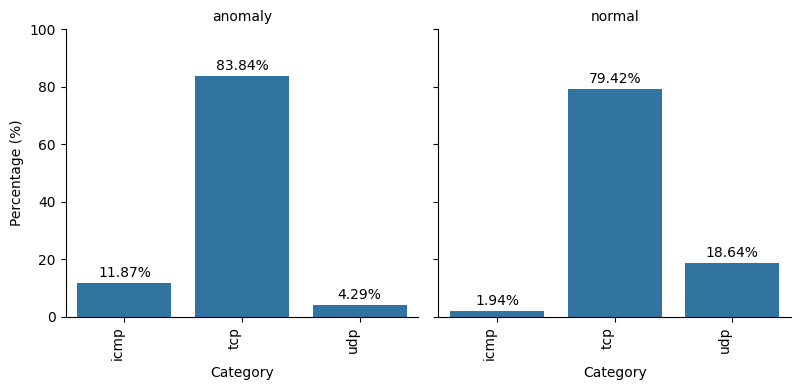

------------------------------
Processing flag...


flag     OTH   REJ  RSTO  RSTOS0  RSTR    S0  S1  S2  S3     SF  SH
class                                                              
anomaly    4  1701   260      21   469  6929   2   4   0   2310  43
normal     1   515    44       0    28    80  86  17  15  12663   0


chi^2 statistic: 15153.701360910532
p-value: 0.0
significant




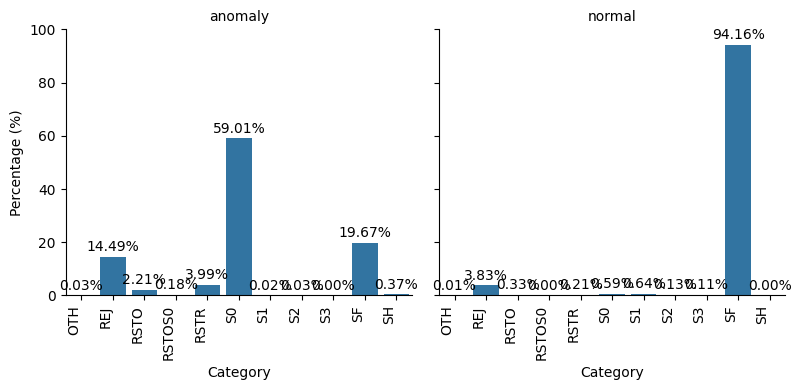

------------------------------
Processing service_category...


service_category  Diagnostics  Email  File_Transfer  Network_Services  Other  \
class                                                                          
anomaly                   303    569            964              1134   5728   
normal                    130   1424           1177              1878    932   

service_category  Remote_Access  System_Infrastructure  Unknown   Web  
class                                                                  
anomaly                     671                   1424      288   662  
normal                      210                     93       41  7564  


chi^2 statistic: 11416.979993330046
p-value: 0.0
significant




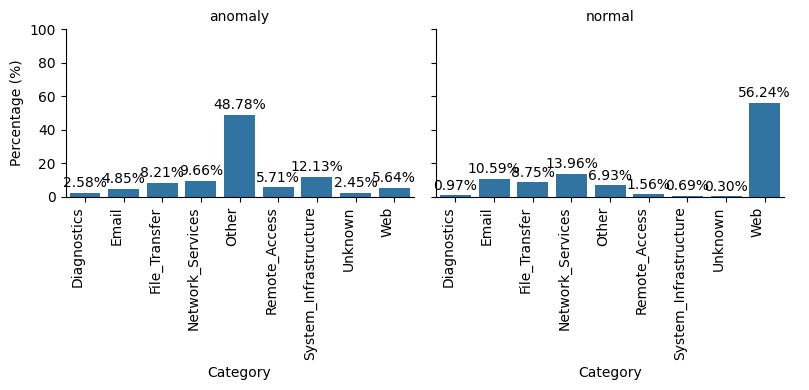

------------------------------


,variable,test,statistic,p_value,significant
0,protocol_type,chi squared,2035.949553,0.0,True
1,flag,chi squared,15153.701361,0.0,True
2,service_category,chi squared,11416.979993,0.0,True


In [75]:
stat_summary_object = pd.DataFrame(columns=['variable', 'test', 'statistic', 'p_value', 'significant'])

for col in object_cols.columns.to_list():
    print(f"Processing {col}...")
    print('\n')

    # Create contingency table (class × category)
    contingency = pd.crosstab(df['class'], df[col])
    print(contingency)
    print('\n')

    # Perform Chi-squared test
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"chi^2 statistic: {chi2}")
    print(f"p-value: {p}")
    if p < 0.05:
        print("significant")
    else:
        print("Not significant")
    print('\n')


    stat_summary_object = pd.concat([
        stat_summary_object,
        pd.DataFrame({
            'variable': [col],
            'test': "chi squared",
            'statistic': [chi2],
            'p_value': [p],
            'significant': [p < 0.05]
        })
    ], ignore_index=True)

    # Convert counts to percentages within each class (rows sum to 100)
    pct = contingency.div(contingency.sum(axis=1), axis=0) * 100.0
    # Make long tidy dataframe suitable for seaborn
    pct_long = pct.reset_index().melt(id_vars='class', var_name=col, value_name='percentage')

    # Plot: two facets (one for each class) with category on x and percent on y
    # Ensure consistent ordering of category ticks
    cat_order = list(contingency.columns)  # keeps same category ordering as contingency

    g = sns.catplot(
        data=pct_long,
        x=col,
        y='percentage',
        col='class',
        kind='bar',
        order=cat_order,
        sharey=True,
        height=4,
        aspect=1
    )

    # Formatting
    g.set_axis_labels("Category", "Percentage (%)")
    g.set_titles("{col_name}")
    for ax in g.axes.flat:
        ax.set_ylim(0, 100)  # percentages go 0-100
        plt.setp(ax.get_xticklabels(), rotation=90, ha='right')

    # Add percentage labels on bars (formatted as "xx.xx%")
    for ax in g.axes.flat:
        for container in ax.containers:
            # container may contain bars
            ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=2)

    # Title including chi2 p-value
    # p_disp = f"{p:.3e}" if not pd.isna(p) else "nan"
    # note = " (expected<5 present)" if any_expected_lt_5 else ""
    # plt.suptitle(f"{col} — chi2 p={p_disp}{note}", y=1.05)

    plt.tight_layout()
    plt.show()
    print("---"*10)

# Sort by p-value for clarity
stat_summary_object

## Summary
From our analysis its obvious that the majority of features play some role in determining whether the intrusion is normal or an anomaly Below we present the table summarizing all statistical tests conducted here, sorted by p value:

In [78]:
stat_summary = pd.concat([stat_summary_float, stat_summary_int1, stat_summary_int2, stat_summary_object], axis=0, ignore_index=True).sort_values('p_value').reset_index(drop=True)
stat_summary

,variable,test,statistic,p_value,significant
0,serror_rate,Mann–Whitney U,3.063709e+07,0.000000e+00,True
1,protocol_type,chi squared,2.035950e+03,0.000000e+00,True
2,logged_in,chi squared,1.192457e+04,0.000000e+00,True
3,dst_host_srv_count,Mann–Whitney U,1.406904e+08,0.000000e+00,True
4,dst_host_count,Mann–Whitney U,4.668424e+07,0.000000e+00,True
5,count,Mann–Whitney U,2.830455e+07,0.000000e+00,True
6,flag,chi squared,1.515370e+04,0.000000e+00,True
7,dst_bytes,Mann–Whitney U,1.420932e+08,0.000000e+00,True
8,src_bytes,Mann–Whitney U,1.419217e+08,0.000000e+00,True
9,dst_host_srv_serror_rate,Mann–Whitney U,3.413011e+07,0.000000e+00,True
